<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras Syntax Basics

With TensorFlow 2.0 , Keras is now the main API choice. Let's work through a simple regression project to understand the basics of the Keras syntax and adding layers.

## The Data

To learn the basic syntax of Keras, we will use a very simple fake data set, in the subsequent lectures we will focus on real datasets, along with feature engineering! For now, let's focus on the syntax of TensorFlow 2.0.

Let's pretend this data are measurements of some rare gem stones, with 2 measurement features and a sale price. Our final goal would be to try to predict the sale price of a new gem stone we just mined from the ground, in order to try to set a fair price in the market.

### Load the Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../DATA/fake_reg.csv')

In [4]:
df.head(10)

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531
5,542.983672,999.693184,1000.628006
6,555.485664,1000.275855,1000.444949
7,417.569725,1000.414205,998.878486
8,373.146531,1000.016606,998.475997
9,633.350292,999.905646,1001.594481


### Explore the data

Let's take a quick look, we should see strong correlation between the features and the "price" of this made up product.

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

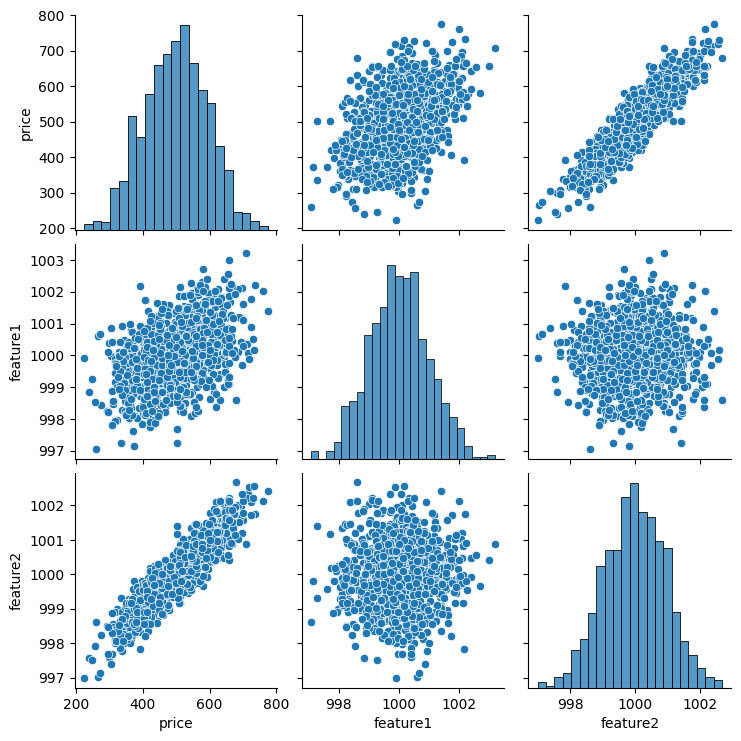

In [6]:
sns.pairplot(df)

Feel free to visualize more, but this data is fake, so we will focus on feature engineering and exploratory data analysis later on in the course in much more detail!

### Test/Train Split

In [7]:
from sklearn.model_selection import train_test_split

In [9]:
# Convert Pandas to Numpy for Keras

# Features
X = df[['feature1','feature2']].values

# Label
y = df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [10]:
X_train.shape

(700, 2)

In [11]:
X_test.shape

(300, 2)

In [12]:
y_train.shape

(700,)

In [15]:
y_test.shape
y_test

array([655.39140319, 511.36670783, 515.77844597, 478.35823792,
       543.83027912, 550.89673991, 597.71257172, 623.05449555,
       606.29736199, 552.35874313, 424.72778986, 480.87733296,
       454.01363039, 484.229812  , 498.6284209 , 565.19184559,
       363.4303791 , 503.51419982, 579.73083872, 537.12524033,
       473.14373027, 343.73541799, 484.46159148, 536.00593624,
       581.24757434, 539.68399729, 362.68807582, 548.9107991 ,
       645.7084402 , 503.27065876, 570.06729543, 476.19497523,
       558.34939279, 698.41041396, 378.79339707, 425.48260511,
       461.49048992, 442.17202786, 374.19760282, 560.79471778,
       333.08087339, 622.99764305, 621.59703226, 527.61587693,
       576.8926402 , 488.78691774, 456.72099249, 409.67675815,
       527.05754159, 627.64016416, 477.59301587, 502.90947332,
       628.84940437, 416.37530318, 417.56972453, 574.51560687,
       361.96928555, 502.40592148, 517.32199998, 656.65474461,
       519.32640956, 292.1917811 , 331.12168828, 411.18

## Normalizing/Scaling the Data

We scale the feature data.

[Why we don't need to scale the label](https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re)

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [15]:
# Notice to prevent data leakage from the test set, we only fit our scaler to the training set

In [18]:
scaler.fit(X_train)

MinMaxScaler()

In [19]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# TensorFlow 2.0 Syntax


## Import Options

There are several ways you can import Keras from Tensorflow (this is hugely a personal style choice, please use any import methods you prefer). We will use the method shown in the **official TF documentation**.

In [20]:
import tensorflow as tf

In [21]:
from tensorflow.keras.models import Sequential

## Creating a Model

There are two ways to create models through the TF 2 Keras API, either pass in a list of layers all at once, or add them one by one.

Let's show both methods (its up to you to choose which method you prefer).

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

### Model - as a list of layers

In [22]:
model = Sequential([
    Dense(units=2),
    Dense(units=2),
    Dense(units=2)
])

### Model - adding in layers one by one

In [23]:
model = Sequential()

model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(2))

Let's go ahead and build a simple model and then compile it by defining our solver

In [24]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

# Training

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

* Sample: one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* Batch: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

In [25]:
model.fit(X_train,y_train,epochs=500)

Epoch 1/500
22/22 [==============================] - 0s 785us/step - loss: 259085.5312
Epoch 2/500
22/22 [==============================] - 0s 595us/step - loss: 258988.8438
Epoch 3/500
22/22 [==============================] - 0s 596us/step - loss: 258871.4531
Epoch 4/500
22/22 [==============================] - 0s 623us/step - loss: 258732.4375
Epoch 5/500
22/22 [==============================] - 0s 596us/step - loss: 258570.0312
Epoch 6/500
22/22 [==============================] - 0s 596us/step - loss: 258382.4844
Epoch 7/500
22/22 [==============================] - 0s 595us/step - loss: 258167.3125
Epoch 8/500
22/22 [==============================] - 0s 614us/step - loss: 257925.6250
Epoch 9/500
22/22 [==============================] - 0s 625us/step - loss: 257652.4844
Epoch 10/500
22/22 [==============================] - 0s 548us/step - loss: 257347.8438
Epoch 11/500
22/22 [==============================] - 0s 548us/step - loss: 257008.2344
Epoch 12/500
22/22 [=====================

## Evaluation

Let's evaluate our performance on our training set and our test set. We can compare these two performances to check for overfitting.

In [28]:
model.history.history

{'loss': [259085.53125,
  258988.84375,
  258871.453125,
  258732.4375,
  258570.03125,
  258382.484375,
  258167.3125,
  257925.625,
  257652.484375,
  257347.84375,
  257008.234375,
  256634.421875,
  256223.703125,
  255773.625,
  255281.0,
  254744.40625,
  254165.375,
  253539.984375,
  252864.390625,
  252136.3125,
  251328.953125,
  250453.390625,
  249514.171875,
  248494.015625,
  247394.515625,
  246215.71875,
  244944.953125,
  243582.015625,
  242128.546875,
  240572.703125,
  238924.984375,
  237173.390625,
  235299.984375,
  233324.25,
  231227.203125,
  229019.453125,
  226687.40625,
  224233.09375,
  221646.453125,
  218917.390625,
  216073.828125,
  213102.15625,
  209979.9375,
  206713.34375,
  203305.21875,
  199769.671875,
  196086.71875,
  192252.984375,
  188293.0625,
  184184.78125,
  179925.734375,
  175532.265625,
  171006.765625,
  166346.546875,
  161532.15625,
  156594.46875,
  151512.234375,
  146337.71875,
  141021.21875,
  135625.640625,
  130112.1015625,

In [29]:
loss = model.history.history['loss']

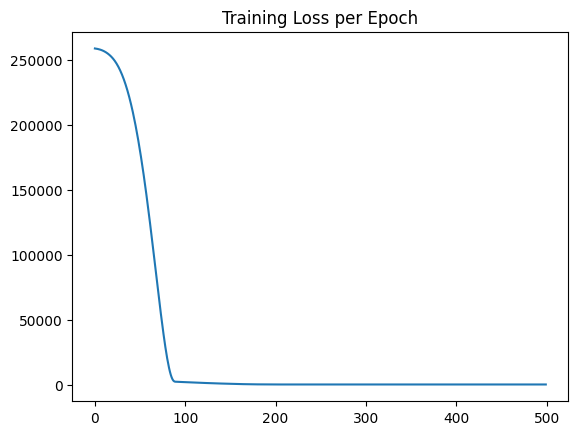

In [30]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

### Compare final evaluation (MSE) on training set and test set.

These should hopefully be fairly close to each other.

In [31]:
model.metrics_names

['loss']

In [32]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [33]:
training_score

23.2635440826416

In [34]:
test_score

27.472747802734375

### Further Evaluations

In [35]:
test_predictions = model.predict(X_test)

10/10 [==============================] - 0s 660us/step


In [36]:
test_predictions

array([[654.27606],
       [511.93176],
       [518.35876],
       [485.00143],
       [541.48865],
       [555.5346 ],
       [601.8939 ],
       [629.8489 ],
       [600.4293 ],
       [555.7352 ],
       [416.3493 ],
       [473.8297 ],
       [447.28015],
       [482.47516],
       [489.99384],
       [565.0577 ],
       [364.71246],
       [501.55096],
       [578.10974],
       [529.99   ],
       [472.5844 ],
       [344.2071 ],
       [484.2624 ],
       [529.2955 ],
       [585.52   ],
       [545.47906],
       [365.04953],
       [552.2757 ],
       [644.84155],
       [507.99146],
       [564.2709 ],
       [485.62863],
       [555.77094],
       [700.5148 ],
       [380.74414],
       [433.57855],
       [461.09424],
       [431.13354],
       [381.48883],
       [558.473  ],
       [328.38873],
       [616.064  ],
       [614.5912 ],
       [524.8817 ],
       [575.9465 ],
       [484.70657],
       [455.3722 ],
       [410.27322],
       [518.72986],
       [627.7163 ],


In [37]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [38]:
pred_df

,Test Y
0,655.391403
1,511.366708
2,515.778446
3,478.358238
4,543.830279
...,...
295,372.777436
296,639.818362
297,403.062564
298,579.428431


In [41]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [45]:
test_predictions

0      654.276062
1      511.931763
2      518.358765
3      485.001434
4      541.488647
          ...    
295    369.500793
296    637.470825
297    394.975098
298    584.072632
299    511.243103
Length: 300, dtype: float32

In [46]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [47]:
pred_df.columns = ['Test Y','Model Predictions']

In [48]:
pred_df

,Test Y,Model Predictions
0,655.391403,654.276062
1,511.366708,511.931763
2,515.778446,518.358765
3,478.358238,485.001434
4,543.830279,541.488647
...,...,...
295,372.777436,369.500793
296,639.818362,637.470825
297,403.062564,394.975098
298,579.428431,584.072632


Let's compare to the real test labels!

<Axes: xlabel='Test Y', ylabel='Model Predictions'>

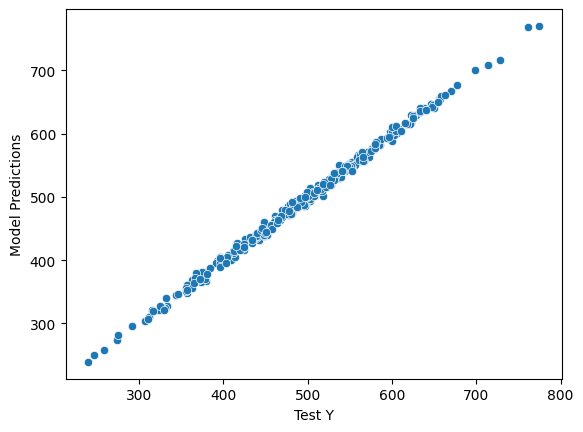

In [49]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

In [50]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

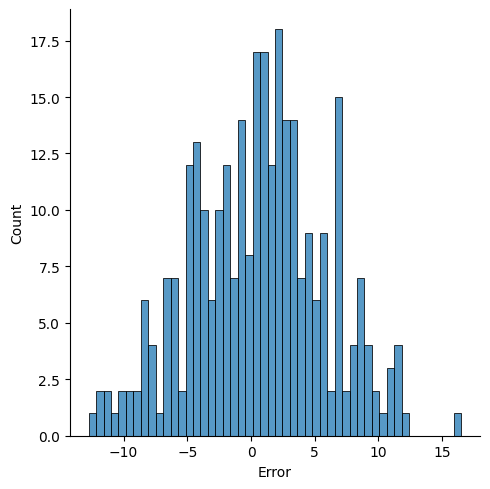

In [52]:
sns.displot(pred_df['Error'],bins=50)

In [53]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [54]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

4.20383941554409

In [55]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

27.47275207095747

In [56]:
# Essentially the same thing, difference just due to precision
test_score

27.472747802734375

In [57]:
#RMSE
test_score**0.5

5.241445201729612

# Predicting on brand new data

What if we just saw a brand new gemstone from the ground? What should we price it at? This is the **exact** same procedure as predicting on a new test data!

In [64]:
# [[Feature1, Feature2]]
new_gem = [[1000,1000]]

In [65]:
# Don't forget to scale!
scaler.transform(new_gem)

array([[0.47099005, 0.52980619]])

In [66]:
new_gem = scaler.transform(new_gem)

In [67]:
model.predict(new_gem)

1/1 [==============================] - 0s 14ms/step


array([[499.2614]], dtype=float32)

## Saving and Loading a Model

In [68]:
from tensorflow.keras.models import load_model

In [70]:
model.save('my_model.keras')  # creates a HDF5 file 'my_model.h5'

In [71]:
later_model = load_model('my_model.keras')

In [72]:
later_model.predict(new_gem)

1/1 [==============================] - 0s 36ms/step


array([[499.2614]], dtype=float32)